In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [3]:
!pip install transformers

     |████████████████████████████████| 501kB 5.1MB/s 
     |████████████████████████████████| 870kB 15.7MB/s 
     |████████████████████████████████| 1.0MB 24.0MB/s 
     |████████████████████████████████| 3.7MB 46.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=69398682ef59886f615b791766a9f12f28e16dbafd943451a13ba2ac66a8e42d
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses


In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/MinorProject/eng_train.csv")
df=df.drop(columns=['ID','Sub-task B'])
df=df.rename(columns={"Sub-task A":"label"})
df.head()

,Text,label
0,Next part,NAG
1,Iii8mllllllm\nMdxfvb8o90lplppi0005,NAG
2,🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...,NAG
3,What the fuck was this? I respect shwetabh and...,NAG
4,Concerned authorities should bring arundathi R...,NAG


In [0]:
# df2=pd.read_csv('/content/drive/My Drive/MinorProject/hin_dev.csv')
# df2=df2.drop(columns=['ID','Sub-task B'])
# df2=df2.rename(columns={"Sub-task A":"label"})
# df2.head()

In [7]:
df3=pd.read_csv('/content/drive/My Drive/MinorProject/agr_en_dev.csv',names=['File_ID','Text','label'])
df3=df3.drop(columns=['File_ID'])
df3.head()

,Text,label
0,The quality of re made now makes me think it i...,CAG
1,@siva \nHow is ur mother???\nHow is ur wife???...,NAG
2,Also see ....hw ur RSS activist caught in Burk...,NAG
3,On the death of 2 jawans in LOC CROSS FIRING\n...,NAG
4,Modi ho ya Manmohan singh saala yeh log kuch n...,OAG


In [8]:
df4=pd.read_csv('/content/drive/My Drive/MinorProject/agr_en_fb_gold.csv',names=['File_ID','Text','label'])
df4=df4.drop(columns=['File_ID'])
df4.head()

,Text,label
0,If government of india don't take strict actio...,NAG
1,So now we know. The women should be under the ...,NAG
2,गद्दारो तुमसे ही तो खतरा है अबकी बार साफ हो जाओगे,NAG
3,Do you think markets are gonna be sideways til...,NAG
4,Jago Urjut Jago....\nSave common people from\n...,NAG


In [9]:
df5=pd.read_csv('/content/drive/My Drive/MinorProject/agr_en_tw_gold.csv',names=['File_ID','Text','label'])
df5=df5.drop(columns=['File_ID'])
df5.head()

,Text,label
0,6-0 hahahahahaha har ek pakistani ko yeh pic d...,NAG
1,@sardanarohit :While entire nation is praying ...,OAG
2,shoaib: wahab riaz looks like johnson. kapil d...,NAG
3,"ramraj cottons r. ashwin southindian , chennai...",NAG
4,#indvsuae jeet gaye... :) :) cmon starsports n...,NAG


In [10]:
df6=pd.read_csv('/content/drive/My Drive/MinorProject/agr_en_train.csv',names=['File_ID','Text','label'])
df6=df6.drop(columns=['File_ID'])
df6.head()

,Text,label
0,Well said sonu..you have courage to stand agai...,OAG
1,"Most of Private Banks ATM's Like HDFC, ICICI e...",NAG
2,"Now question is, Pakistan will adhere to this?",OAG
3,Pakistan is comprised of fake muslims who does...,OAG
4,"??we r against cow slaughter,so of course it w...",NAG


In [11]:
df=pd.concat([df,df3,df4,df5,df6])
df.shape

(21436, 2)

In [12]:
df['label'] = df['label'].map({'OAG': 0, 'CAG':1,'NAG':2})
df.head()

,Text,label
0,Next part,2
1,Iii8mllllllm\nMdxfvb8o90lplppi0005,2
2,🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...,2
3,What the fuck was this? I respect shwetabh and...,2
4,Concerned authorities should bring arundathi R...,2


In [0]:
sentences = df.Text.values
labels = df.label.values

In [14]:
sentences

array(['Next part', 'Iii8mllllllm\nMdxfvb8o90lplppi0005',
       '🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more vedios like this',
       ..., 'fabricated news', "What's wrong with you secular idiots",
       'Looks like inevitable after all political hard ball dialogue coupled with diplomacy & arm twisting with international pressures produce little or no results.'],
      dtype=object)

In [15]:
labels

array([2, 2, 2, ..., 0, 0, 2])

In [16]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [17]:
input_ids = []
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent, 
                        add_special_tokens = True,
                   )
    input_ids.append(encoded_sent)

Token indices sequence length is longer than the specified maximum sequence length for this model (676 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (997 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (812 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (606 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (555 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

In [18]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  1651


In [19]:
from keras.preprocessing.sequence import pad_sequences
MAX_LEN = 100
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

Using TensorFlow backend.


In [0]:
attention_masks = []
for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks.append(att_mask)

In [0]:
from sklearn.model_selection import train_test_split
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=42, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=42, test_size=0.1)


In [0]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [0]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [24]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 3, 
    output_attentions = False,
    output_hidden_states = False,
)
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [25]:
params = list(model.named_parameters())
print('The BERT model has {:} different named parameters.\n'.format(len(params)))
print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== Output Layer ====\n')
for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [0]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                )


In [0]:
from transformers import get_linear_schedule_with_warmup
epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [0]:
import numpy as np
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [0]:
import time
import datetime

def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [30]:
import random
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
loss_values = []
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()        
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    avg_train_loss = total_loss / len(train_dataloader)            
    loss_values.append(avg_train_loss)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
    print("")
    print("Running Validation...")
    t0 = time.time()
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    603.    Elapsed: 0:00:13.
  Batch    80  of    603.    Elapsed: 0:00:25.
  Batch   120  of    603.    Elapsed: 0:00:38.
  Batch   160  of    603.    Elapsed: 0:00:51.
  Batch   200  of    603.    Elapsed: 0:01:03.
  Batch   240  of    603.    Elapsed: 0:01:16.
  Batch   280  of    603.    Elapsed: 0:01:28.
  Batch   320  of    603.    Elapsed: 0:01:41.
  Batch   360  of    603.    Elapsed: 0:01:53.
  Batch   400  of    603.    Elapsed: 0:02:06.
  Batch   440  of    603.    Elapsed: 0:02:19.
  Batch   480  of    603.    Elapsed: 0:02:31.
  Batch   520  of    603.    Elapsed: 0:02:44.
  Batch   560  of    603.    Elapsed: 0:02:56.
  Batch   600  of    603.    Elapsed: 0:03:09.

  Average training loss: 0.84
  Training epcoh took: 0:03:10

Running Validation...
  Accuracy: 0.63
  Validation took: 0:00:06

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    603.    Elapsed: 0:00:13.
  Batch    80  of    603.    Elap

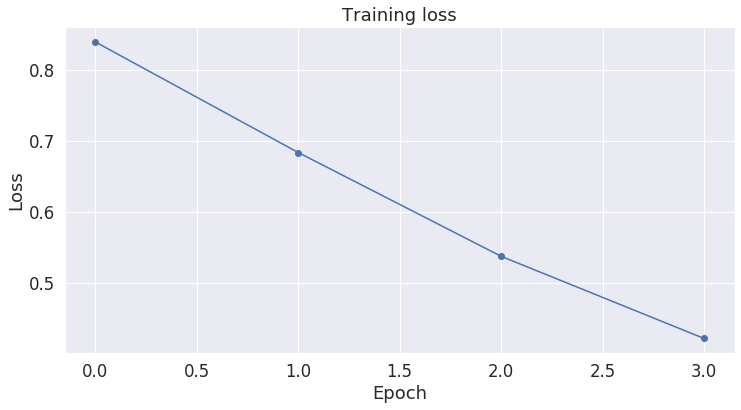

In [39]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(loss_values, 'b-o')
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [40]:
df1 = pd.read_csv("/content/drive/My Drive/MinorProject/eng_dev.csv")
df1=df1.drop(columns=['ID','Sub-task B'])
print('Number of test sentences: {:,}\n'.format(df1.shape[0]))
df1=df1.rename(columns={"Sub-task A":"label"})
df1['label'] = df1['label'].map({'OAG': 0, 'CAG':1,'NAG':2})
df.head()

Number of test sentences: 1,066



,Text,label
0,Next part,2
1,Iii8mllllllm\nMdxfvb8o90lplppi0005,2
2,🤣🤣😂😂🤣🤣🤣😂osm vedio ....keep it up...make more v...,2
3,What the fuck was this? I respect shwetabh and...,2
4,Concerned authorities should bring arundathi R...,2


In [0]:

sentences = df1.Text.values
labels = df1.label.values


In [42]:
input_ids = []
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,                     
                        add_special_tokens = True, 
                                           )
    
    input_ids.append(encoded_sent)
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")
attention_masks = []
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)
batch_size = 32  
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Token indices sequence length is longer than the specified maximum sequence length for this model (576 > 512). Running this sequence through the model will result in indexing errors


In [43]:

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))
model.eval()
predictions , true_labels = [], []
for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch  
  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  predictions.append(logits) 
  true_labels.append(label_ids)


Predicting labels for 1,066 test sentences...


In [44]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Positive samples: 27849 of 21436 (129.92%)


In [45]:
from sklearn.metrics import classification_report
clf_set = []
for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  clf = classification_report(true_labels[i], pred_labels_i)                
  clf_set.append(clf)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]
clf= classification_report(flat_true_labels, flat_predictions)
print(clf)

              precision    recall  f1-score   support

           0       0.43      0.64      0.51       113
           1       0.31      0.38      0.34       117
           2       0.91      0.83      0.87       836

    accuracy                           0.76      1066
   macro avg       0.55      0.61      0.57      1066
weighted avg       0.80      0.76      0.77      1066

